# Accused Witches in Scotland 

## Describe

The type of our data is sheet, basically it is a information about the 3218 witches accused, however, time period was not provided. It gave us  the information below: 
Unique identifier - initials plus system number, Initials ofrecord creator, System number,First name as given in the source,Surname as given in the source,Standard modern first name,Standard modern surname ,Name with patronymic） or soubriquet ,Patronymic ,Designation or Title ,Sex of the accused ,Age at time of case ,Indicates that age has been estimated from career,Indicates that age has been estimated from the existence of children, settlement, parish, presbytery, county, burgh ,Grid reference of place of residence - letters,Grid reference of place of residence - easting, Grid reference of place of residence - northing, Date record last updated, Name of person who last updated the record, Date record created, Name of person who created this record, Notes on the accused, Occupation, Socio-economic status, Marital status, Ethnic origin.

The csv. file has 3219 rows and 32 columns, its size is 99789. The distribution of ‘Age’ is from 9 years old to 100 years old. (Not sure about this 100 value). As this is the only data we deal with, there is no other data linked with. 


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('WDB_Accused.csv')
#map=pd.read_csv('worldcitiespop.utf-8')
#map.head()

In [3]:
df.head()

,AccusedRef,AccusedSystemId,AccusedID,FirstName,LastName,M_Firstname,M_Surname,Alias,Patronymic,DesTitle,...,Res_NGR_Northing,Ethnic_origin,MaritalStatus,SocioecStatus,Occupation,Notes,Createdby,Createdate,Lastupdatedby,Lastupdatedon
0,A/EGD/10,EGD,10,Mareon,Quheitt,Marion,White,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,09/08/2002 11:40:51
1,A/EGD/100,EGD,100,Thom,Cockburn,Thomas,Cockburn,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,02/10/2002 10:32:30
2,A/EGD/1000,EGD,1000,Christian,Aitkenhead,Christine,Aikenhead,NaN,NaN,NaN,...,NaN,NaN,Married,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:48:12
3,A/EGD/1001,EGD,1001,Janet,Ireland,Janet,Ireland,NaN,NaN,NaN,...,NaN,NaN,Widowed,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:49:00
4,A/EGD/1002,EGD,1002,Agnes,Hendersoun,Agnes,Henderson,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,SMD,15/05/2001 11:06:51,jhm,01/10/2002 10:50:07


Large and complex

In [4]:
df.shape

(3219, 31)

In [5]:
df.size

99789

Age frame

In [6]:
print(np.max(df['Age']))
print(np.min(df['Age']))

100.0
9.0


## Explore-- Age and Sex

After type the max age of the witches, there was a 100 years old women.I am not sure about the validity of this data, as 100 year-old 'witch' may be true. So, I draw a displot to see its rough distribution.

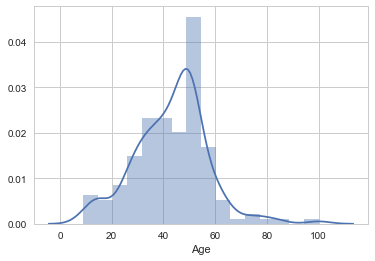

In [7]:
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# not NaN 
dfA = df[np.isfinite(df['Age'])]
#df=df.loc[df.Age>=9]
sns.distplot(dfA.Age)
plt.show()

It is so significant that most of the witches were old women, cause women were linked more readily than men with negative beliefs about the practice of harmful magic and association with the devil, or because systems of power in communities and courts worked against women rather than men. 


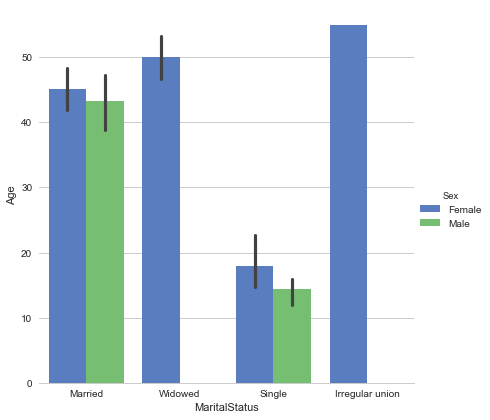

In [8]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="MaritalStatus", y="Age",hue="Sex",data=dfA,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Age")

## Explore--City Distribution 

In [9]:
city = df['Res_county']
from collections import Counter
citycount=Counter()

for i in city:
 citycount[i]+=1

print(citycount)

Counter({'Haddington': 543, 'Fife': 382, 'Edinburgh': 374, 'Aberdeen': 175, 'Ayr': 153, 'Berwick': 126, 'Renfrew': 124, nan: 115, 'Linlithgow': 114, 'Perth': 109, 'Peebles': 91, 'Forfar': 82, 'Dumfries': 78, 'Lanark': 77, 'Ross': 74, 'Orkney': 72, 'Roxburgh': 60, 'Nairn': 55, 'Bute': 54, 'Stirling': 53, 'Caithness': 52, 'Inverness': 45, 'Kirkcudbright': 35, 'Elgin': 28, 'Shetland': 28, 'Dunbarton': 25, 'Selkirk': 21, 'Clackmannan': 18, 'Wigtown': 15, 'Sutherland': 15, 'Banff': 9, 'Kinross': 7, 'Argyll': 6, 'Kincardine': 2, 'Cromarty': 2})


## Explore-- Social Status

From the boxplot, we could know that the age distribution of female was more concentrated than that of man.

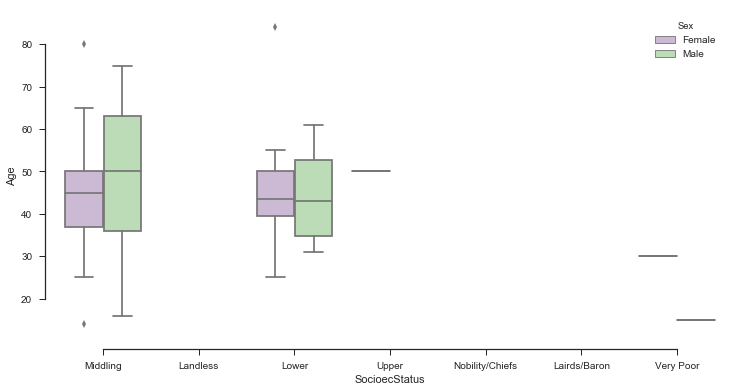

In [10]:
plt.figure(figsize=(12,6))
sns.set(style="ticks")
sns.boxplot(x="SocioecStatus", y="Age", hue="Sex", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

It can be seem from the piechart that the very poor, the landless, the lower and the middling account for the 57.18% of the total population, the null was not included. Something interesting that the upper and teh nobility/chiefs also comprise 42 percent, which is not accord with the common sense of craftwitches.

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

soc=df.groupby('SocioecStatus').count().AccusedRef.reset_index()
soc.column=['SocioecStatus','Count']
labels = soc.SocioecStatus
values = soc.index
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='SocioecStatus_Situation')

## Explore-- MaritalStatus

From the information we already know, we know that most witches were widowed married middle-aged women. 

In [12]:
import plotly.plotly as py
import plotly.graph_objs as go

mar=df.groupby('MaritalStatus').count().AccusedRef.reset_index()
mar.column=['MaritalStatus','Count']
labels = mar.MaritalStatus
values = mar.index
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='Marrage_Situation')


## Explore-- Name

Within all the 3218 witches, there are over 350 persons named Margaret, almost 10% of the tatal population. After caculating the residence they belonged to, there is an apparent gather in some cities.

In [13]:
name=df.groupby('FirstName').count()
#df=df.loc[Accused>=9]
#name.loc[name.AccusedRef>=9].AccusedRef


Index(['Margaret', 'Jonet', 'Janet', 'Agnes', 'Bessie', 'Marion', 'Issobell',
       'John', 'Helen', 'Elspeth', 'Katherine', 'Christian', 'William',
       'Unknown', 'Jonnet', 'James', 'Jean', 'Marioun', 'Elizabeth', 'Thomas',
       'Isobel', 'Barbara', 'Margret', 'Elspet', 'Isobell', 'Jeane', 'George',
       'Mary', 'Robert', 'Katharine', 'Alexander', 'Marjorie', 'Patrick',
       'Helene', 'Beatrix', 'Cristian', 'Jannet', 'Issobel', 'Catherine',
       'Jon', 'Anna', 'Christiane', 'Marie', 'Jennet', 'Grissell', 'Donald'],
      dtype='object', name='FirstName')


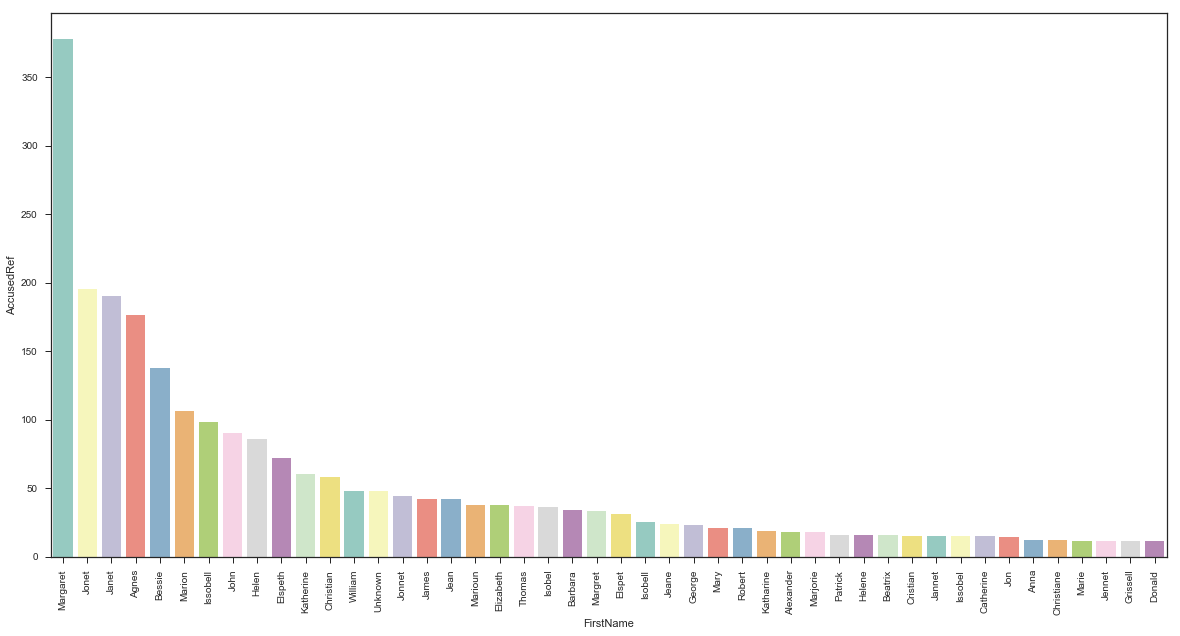

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#name = sns.load_dataset("name")
plt.figure(figsize=(20,10))
names = df.groupby('FirstName').count()
popular_names = names[names['AccusedRef'] > 10].sort_values(by='AccusedRef',ascending=False)
print(popular_names.index)
ax = sns.barplot(x=popular_names.index, y=popular_names['AccusedRef'], palette="Set3")
plt.xticks(rotation=90)
plt.show()

In [15]:
dfmargaret=df.loc[df.FirstName=='Margaret']
res=dfmargaret.groupby('Res_county').count()
#res

 After find these things strange, I looked for the distribution of people named Margaret.

<function matplotlib.pyplot.show>

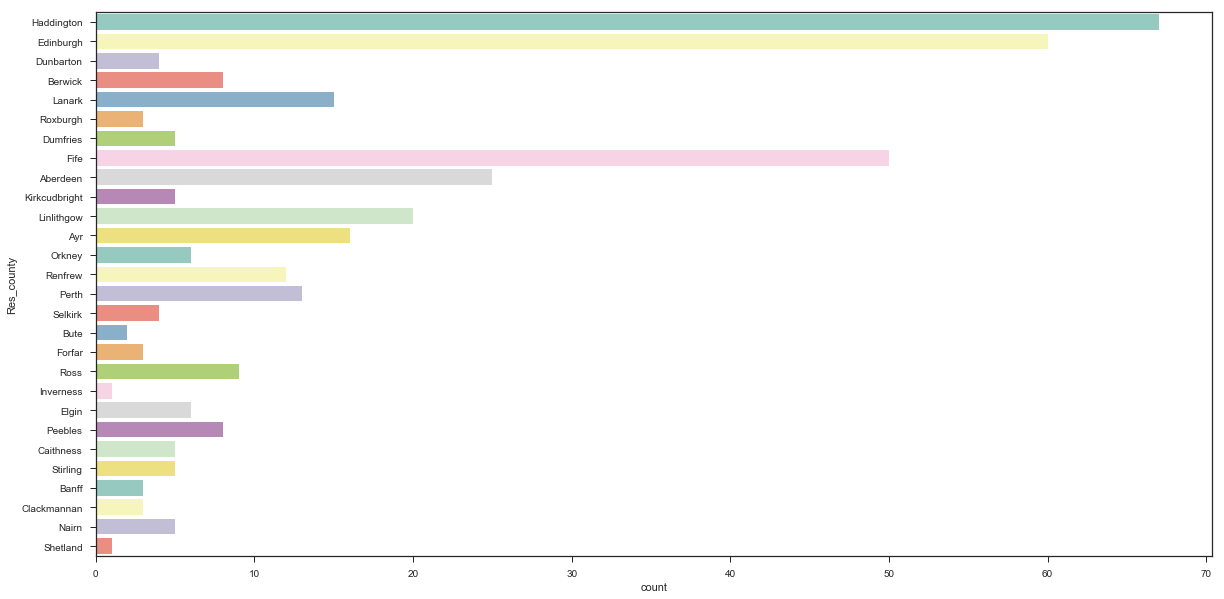

In [16]:
dfmargaret=df.loc[df.FirstName=='Margaret']
plt.figure(figsize=(20,10))
ax = sns.countplot(y="Res_county", data=dfmargaret, palette="Set3")
plt.show

In order to see the geo-distribution more clearly, I put these cities on the map, however, the lat. and lon. value were from web, the data owner did not provide this. The craftwithes gathered in coastal cities. This may related with the distribution of the theocracy and population distribution.

In [17]:
# import the library
import folium


# Make a data frame with dots to show on the map
data = pd.DataFrame({
'lat':[-3.25,-2.76,-4.25,-1.333333,-2.85,-2.5,1.366667,-4.333333,-.53333,-3.25,-3,-3.833333,-3.569419,-3.916667,-4,-4.6,
       -2.916667,-3,-3.333333,-4.533333,-3.5,-3.75,-3.5,-5.25,-2.716667,-4.666667,-2.666667],
'lon':[55.95,55.916,56.25,60.33,55.53,55.5,52.4,55.75,54.116667,55.75,59,57.5,55.889082,55.866667,55,
       57,56.666667,56.333333,57.65,55.966667,55.166667,56.1,58.416667,55.75,56.066667,55.25,57.166667],
'name':['Edinburgh','Haddington','Stirling','Shetland','Selkirk','Roxburgh','Ross','Renfrew','Perth','Peebles','Orkney',
        'Nairn','Linlithgow','Lanark','Kirkcudbright','Inverness','Forfar','Fife','Elgin','Dunbarton','Dumfries',
        'Clackmannan','Caithness','Bute','Berwick','Ayr','Aberdeen'],
'value':[60,67,5,1,4,3,9,12,13,8,6,5,20,15,5,1,3,50,6,4,5,3,5,2,8,16,25]
})
data

# Make an empty map
m = folium.Map(location=[55.95,-2.23], tiles="Mapbox Bright", zoom_start=6.5)

# I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(
    location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
    popup=data.iloc[i]['name'],
    radius=float(data.iloc[i]['value']*130),
    color='crimson',
    fill=True,
    fill_color='crimson'
    ).add_to(m)

# Save it as html
m.save('313_bubble_on_folium_map1.html')
m

# Reflection and Hypotheses

It is so significant that most of the witches were old poor married women and widow, cause women were linked more readily than men with negative beliefs about the practice of harmful magic and association with the devil, or because systems of power in communities and courts worked against women rather than men.  Disadvantaged groups tend to be suffered. And this history may remind people of sex fair and Feminism. It also remind us of that revolution took time, as the peak time of witchcraft was exactly Renaissance, which period call for human rights and people oriented. Below are some reflections and hypotheses about our data.


Social Status

From pie chart in 'Explore-- Social Status',something confused me is that rich people also get trialed and killed, which may lead us to rethink the class of that time. 

Name

From the bar chart in ‘Explore— Name’, we could see along 3218 witches recorded, over 350 witches named Margaret. Heraldry.sca.org. (2017) provided the feminine names in Scottish records, which shows that Margaret was a really popular name from 15th century to 17th century.  Based on these, firstly, we can search the Accused_family to see if there is some relationships between names and family names. Secondly, we could work on other distribution of other popular names and combine all the popular names together to see if there is a link. Thirdly, we could search for some algorithms or  psychological models.  As Bon, G. (2016) in this book ‘The Crowed’ suggested, people tend to make illogical decisions and be instigated when they are in a group. 

Population Distribution

From the bubble map in ‘Explore— Name’, maybe we could go further about the trend of distribution of the population from 15th -17th century,  to see why craft witches more tend to trialed in coastal cities. 


### Reference

Heraldry.sca.org. (2017). Feminine Names in Scottish Records: intro. [online] Available at: http://heraldry.sca.org/names/scottishfem.html [Accessed 15 Nov. 2017].
Bon, G. (2016). The Crowd. Lanham: Dancing Unicorn Books.